<h1>Introduction to Statistics</h1>

In [26]:
import pandas as pd
import statsmodels as sm
from plotnine import *
import scipy as sp
from scipy import stats
import numpy as np

In [11]:
ames_py = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/Ames.csv")
ames_py.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899


c:\Users\irvin\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 64'. Pick better value with 'binwidth'.


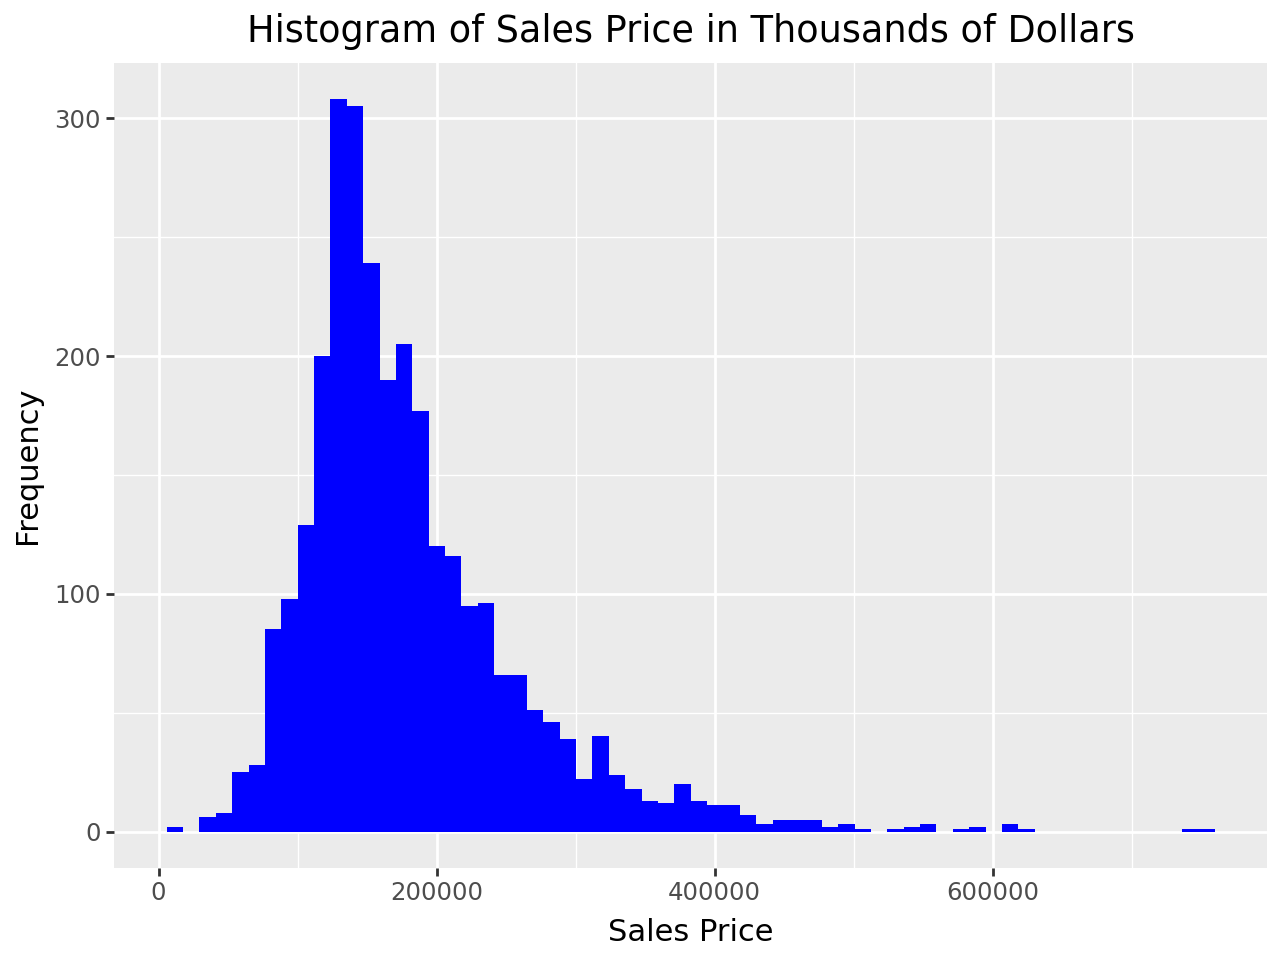

In [12]:
#Histogram

ames_py["Sales"] = ames_py["Sale_Price"]/1000

p = (
    ggplot(ames_py, aes(x="Sale_Price")) +
    geom_histogram(fill="blue") +
    labs(
        x="Sales Price",
        y="Frequency",
        title="Histogram of Sales Price in Thousands of Dollars"
    )
)

p.show()



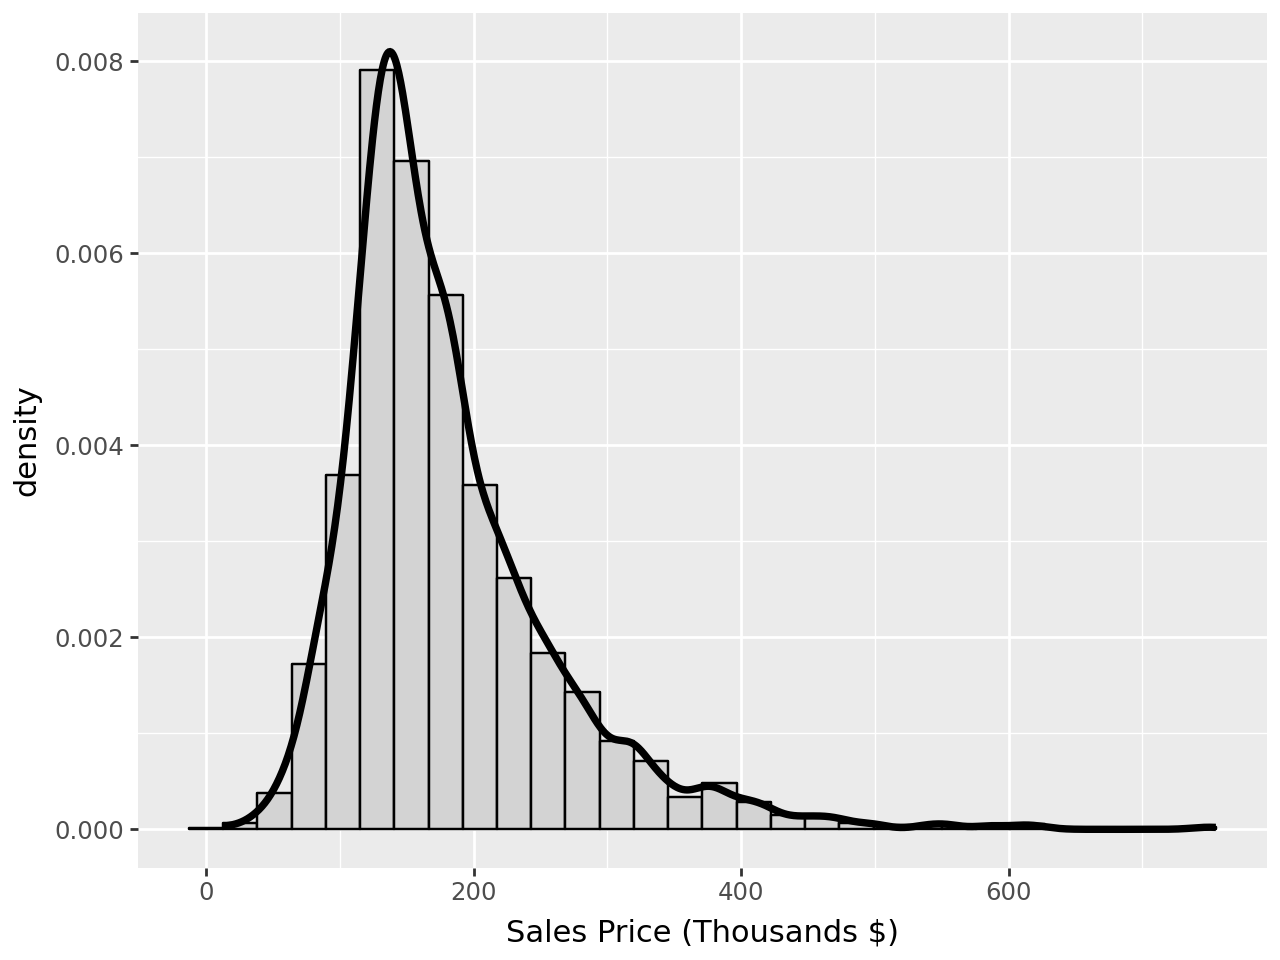

In [13]:
#Density Plot

p = (
ggplot(ames_py, aes(x='Sales')) +
geom_histogram(aes(y='..density..'), bins=30,
fill='lightgray', color='black') +
geom_density(color='black', size=1.5) +
labs(x='Sales Price (Thousands $)')
)
p.show()

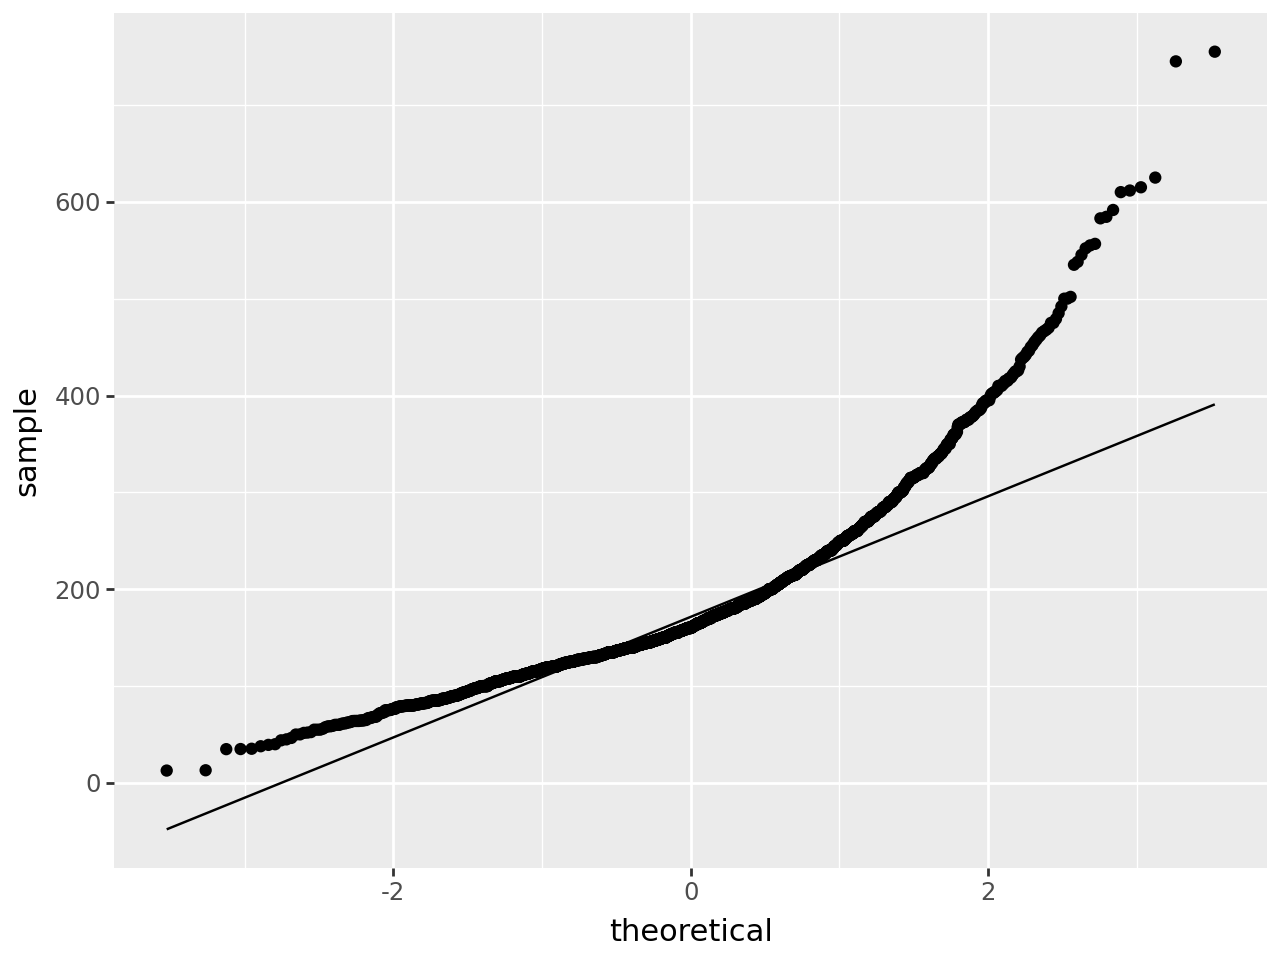

In [14]:
#Normal Probability Plot

p = (
ggplot(ames_py, aes(sample = "Sales")) +
stat_qq() +
stat_qq_line()
)
p.show()


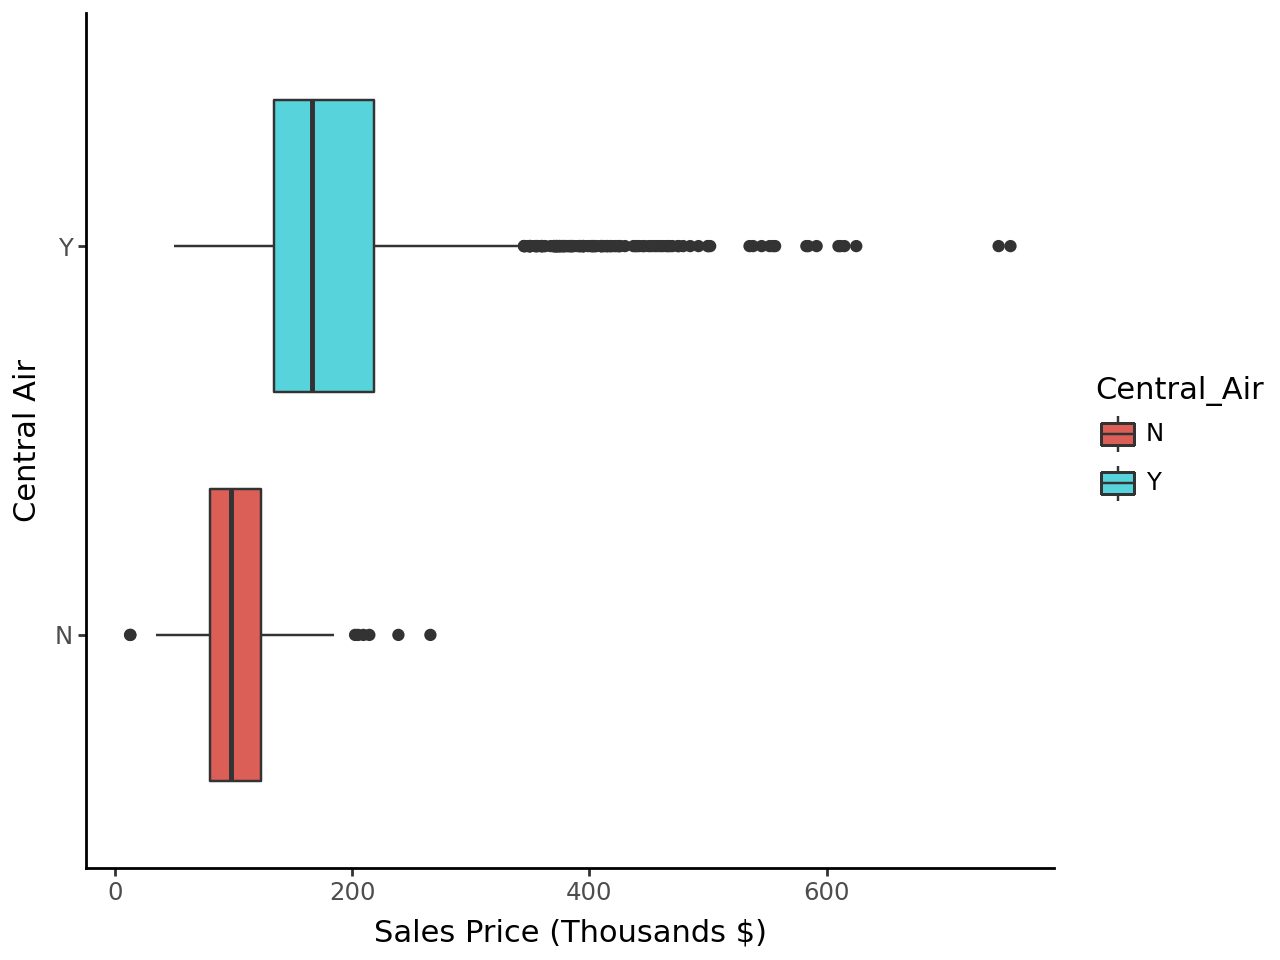

In [15]:
#Boxplot

p = (
ggplot(ames_py, aes(y = "Sales", x = "Central_Air", fill =
"Central_Air")) +
geom_boxplot() +
labs(y = "Sales Price (Thousands $)", x = "Central Air") +
theme_classic() + coord_flip()
)
p.show()

In [28]:
#Confidence Intervals

d = sm.stats.weightstats.DescrStatsW(ames_py['Sale_Price'])
d.tconfint_mean(0.05)

(177902.26200144587, 183689.85813507292)

In [17]:
#Two Sided T-Test for the Mean

d = sm.stats.weightstats.DescrStatsW(ames_py['Sale_Price'])
test_stat, p_val, df = d.ttest_mean(value=178000, alternative='two-sided')

print(test_stat,p_val,df)

1.89454911013789 0.05825057277962961 2929.0


In [19]:
#One Sided T-Test for the Mean

d = sm.stats.weightstats.DescrStatsW(ames_py['Sale_Price'])
test_stat, p_val, df = d.ttest_mean(value = 178000, alternative = 'larger')

print(test_stat,p_val,df)

1.89454911013789 0.029125286389814806 2929.0


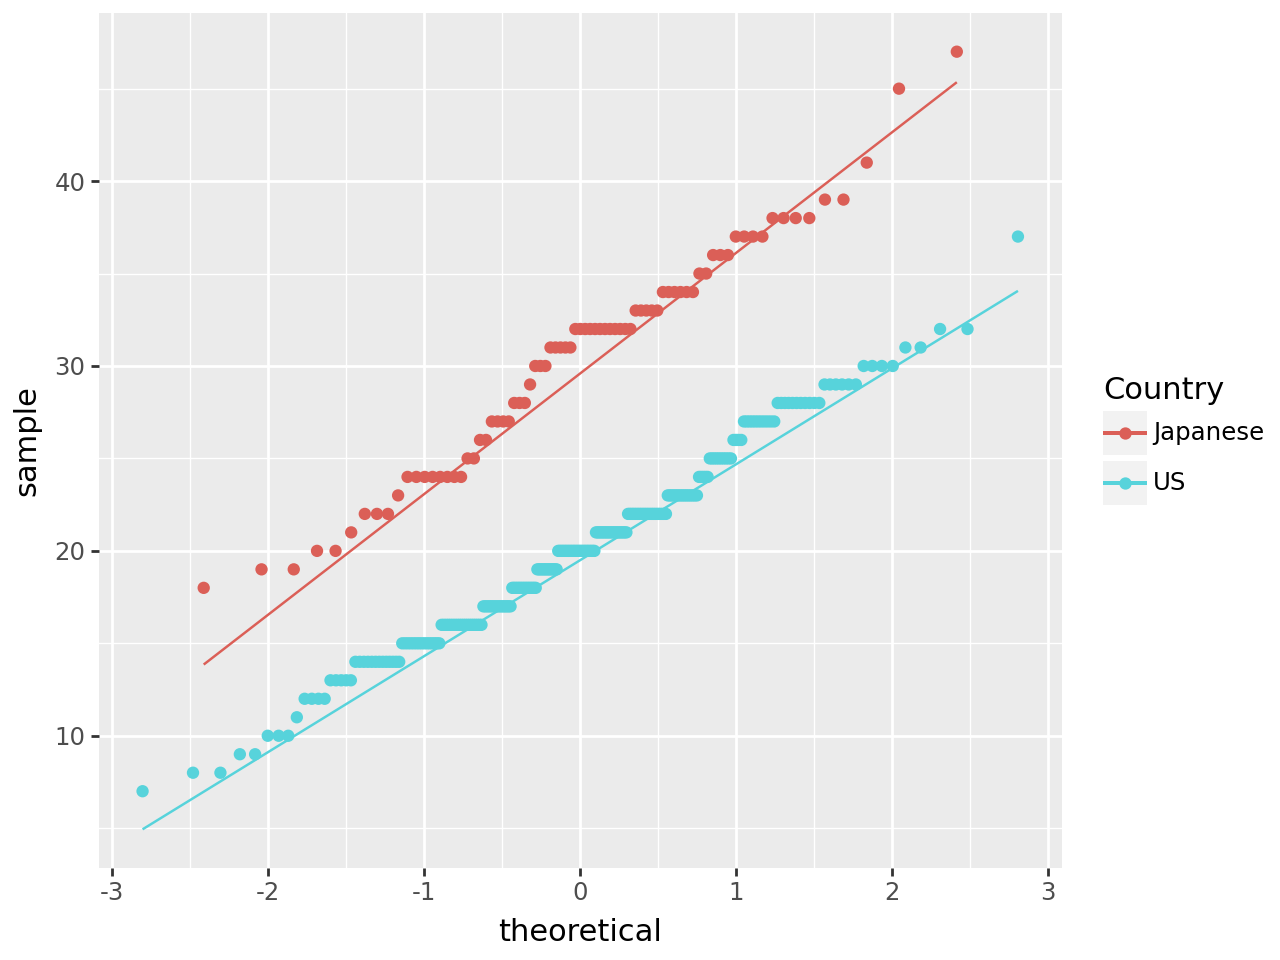

In [ ]:
#Visualizing Normality of Two Samples

py_cars = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/cars.csv")

p = (
ggplot(py_cars, aes(sample='MPG', color='Country')) +
stat_qq() +
stat_qq_line()
)

p.show()

In [ ]:
#Verifying Normality of Two Samples Using Shapiro-Wilk Test

stat, p = stats.shapiro(py_cars[py_cars["Country"] ==
'US']['MPG'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")


stat, p = stats.shapiro(py_cars[py_cars["Country"] ==
'Japanese']['MPG'])
print(f"Test Statistic = {stat:.4f}")
print(f"P-value = {p:.4f}")


Test Statistic = 0.9887
P-value = 0.0492
Test Statistic = 0.9768
P-value = 0.1586


In [7]:
#Checking for Equality of Variances of Two Samples

sp.stats.levene(py_cars[py_cars["Country"] == 'US']['MPG'],
py_cars[py_cars["Country"] == 'Japanese']['MPG'])

LeveneResult(statistic=2.698137119235061, pvalue=0.10142974483944231)

In [20]:
#Perform a Pooled Two Sample T-Test Since The Variances are Equal (Otherwise Perform Satterwaite's Approximate T-Test)

sp.stats.ttest_ind(py_cars[py_cars["Country"] == 'US']['MPG'],
py_cars[py_cars["Country"] == 'Japanese']['MPG'], equal_var = True)



TtestResult(statistic=-14.767000838703165, pvalue=3.8463879746671766e-38, df=326.0)

In [21]:
#Nonparametic Test (Wilcoxon Rank Test)

sp.stats.mannwhitneyu(ames_py[ames_py["Central_Air"] == 'Y']['Sale_Price'],
ames_py[ames_py["Central_Air"] == 'N']['Sale_Price'])


MannwhitneyuResult(statistic=472700.0, pvalue=1.2086496396714786e-71)

In [27]:
#Bootstrapping and Testing the Difference of Two Medians

##Bootstrapping Function
def boot(x1, x2, direction, alpha):
    x1 = np.array(x1)
    x2 = np.array(x2)

    # Bootstrap resampling
    x1_boot = np.random.choice(x1, size=(10000, len(x1)), replace=True)
    x2_boot = np.random.choice(x2, size=(10000, len(x2)), replace=True)

    # Compute bootstrapped differences in medians
    test_boot = np.median(x1_boot, axis=1) - np.median(x2_boot, axis=1)

    # Compute p-value and decision
    if direction == "greater":
        p_value = np.mean(test_boot <= 0)
        result = "significant" if p_value < alpha else "not significant"
    elif direction == "less":
        p_value = np.mean(test_boot >= 0)
        result = "significant" if p_value < alpha else "not significant"
    elif direction == "ne":
        p_value = 2 * min(np.mean(test_boot <= 0), np.mean(test_boot >= 0))
        result = "significant" if p_value < alpha else "not significant"
    else:
        raise ValueError("direction must be 'greater', 'less', or 'ne'")

    return result, p_value
  
  
### Now run the test:

x1 = ames_py.loc[ames_py['Central_Air'] == 'Y', 'Sale_Price'].to_numpy()
x2 = ames_py.loc[ames_py['Central_Air'] == 'N', 'Sale_Price'].to_numpy()

boot(x1, x2, 'ne', 0.05)



('significant', 0.0)